In [14]:
import numpy as np
from numpy.linalg import inv
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt

### Problem Set 9

The Linear Gaussian State Space Models are defined as
\begin{eqnarray*}
z_t &=& A\; z_{t-1} +B\; u_t +\epsilon_t, \;\;\; \epsilon_t \sim N(0,Q)\\
x_t &=& C\; z_t+D\; u_t + \delta_t, \;\;\;\delta_t\sim N(0, R).\\
\end{eqnarray*}

To confirm that this models belongs to the above category we can set $z_t=x_t$, $x_t=y_t$, $A=1$, $B=0$, $C=1$, $D=\mu$, $u_t=1$, $Q=\sigma^2$, $R=\omega^2$.


### Simulate Data

Simulate data $100$ points from the model of Exercise 1, setting $\mu=\sigma^2=\omega^2=1$. Consider $\sigma^2$ and $\omega^2$ known and find the MLE of $\mu$ by evaluating the likelihood at a grid of points between $0$ and $2$.

In [43]:
n=100
mutrue = 1
sigmatrue = 1
omegatrue =1
z = np.zeros(n)
for i in range(n-1):
    z[i+1] = z[i] + sigmatrue*np.random.randn(1)
x = z+mutrue+omegatrue*np.random.randn(n)

# Initial Conditions
mu0 = 0
Sigma0 = sigmatrue**2

### Run the Kalman filter

In [44]:
def KFlogL(x,mu0,Sigma0,mu):
    A = 1
    B = 0
    C = 1
    D = mu
    u = 1
    Q = sigmatrue**2
    R = omegatrue**2
    mu = mu0
    Sigma = Sigma0
    logL = 0

    for i in range(n):    
        #Prediction
        mu = A*mu + B*u
        Sigma  = A*Sigma*A+Q        
    
        #Kalman Gain
        S = C*Sigma*C + R
        K = Sigma*C/S

        #Calculate log likelihood based on the i-th measurement
        M = C*mu + D*u 
        logL = logL + multivariate_normal.logpdf(x[i], mean=M, cov=S)
    
        # Correction
        mu = mu + K*(x[i]- C*mu- D*u)
        Sigma = (1 - K*C)*Sigma    
    
    return logL 

In [45]:
mugrid = np.linspace(0,2,200)
logLs = np.zeros(200)
for i in range(200):
    mu = mugrid[i]
    logLs[i] = KFlogL(x,mu0,Sigma0,mu)

Text(0,0.5,'log likelihood')

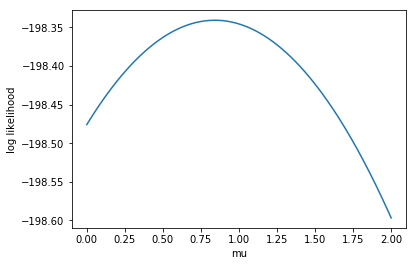

In [46]:
plt.plot(mugrid,logLs)
plt.xlabel('mu')
plt.ylabel('log likelihood')

In [47]:
max_ind = np.argmax(logLs)
mu_MLE = mugrid[max_ind]
print('MLE of mu:')
print(mu_MLE)

MLE of mu:
0.8442211055276382
